DATA CLEANING FILE



In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('delhi_aqi.csv', sep=',')
pm25_bp = [(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200), (91, 120, 201, 300), (121, 250, 301, 400), (251, 350, 401, 500)]
pm10_bp = [(0, 50, 0, 50), (51,100,51,100), (101,250,101,200), (251,350,201,300),(351,430,301,400), (431,500,401,500)]
no2_bp = [(0,40,0,50), (41,80,51,100), (81,180,101,200), (181,280,201,300),(281,400,301,400), (401,1000,401,500)]
so2_bp = [(0,40,0,50), (41,80,51,100), (81,380,101,200), (381,800,201,300),(801,1600,301,400), (1601,2000,401,500)]
co_bp = [(0, 1000, 0, 50), (1001, 2000, 51, 100), (2001, 10000, 101, 200),(10001, 17000, 201, 300), (17001, 34000, 301, 400), (34001, 50000, 401, 500)]
o3_bp = [(0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200), (169, 208, 201, 300),(209, 748, 301, 400), (749, 1000, 401, 500)]

def calc_subindex(conc, bp_list):
    for (low_bp, high_bp, low_aqi, high_aqi) in bp_list:
        if low_bp <= conc <= high_bp:
            return ((high_aqi - low_aqi)/(high_bp - low_bp)) * (conc - low_bp) + low_aqi
    return np.nan

df['AQI_PM25'] = df['pm2_5'].apply(lambda x: calc_subindex(x, pm25_bp))
df['AQI_PM10'] = df['pm10'].apply(lambda x: calc_subindex(x, pm10_bp))
df['AQI_NO2'] = df['no2'].apply(lambda x: calc_subindex(x, no2_bp))
df['AQI_SO2'] = df['so2'].apply(lambda x: calc_subindex(x, so2_bp))
df['AQI_CO'] = df['co'].apply(lambda x: calc_subindex(x, co_bp))
df['AQI_O3'] = df['o3'].apply(lambda x: calc_subindex(x, o3_bp))
aqi_cols = ['AQI_PM25', 'AQI_PM10', 'AQI_NO2', 'AQI_SO2', 'AQI_CO', 'AQI_O3']
df['Net_AQI'] = df[aqi_cols].max(axis=1)
df["co"]=df["co"]/1000
df.to_excel('delhi_aqi_processed.xlsx', index=False)
print(df[['co', 'AQI_CO', 'pm2_5', 'AQI_PM25', 'Net_AQI']].head())


        co      AQI_CO   pm2_5  AQI_PM25     Net_AQI
0  2.61688  108.622468  364.61       NaN  377.104684
1  3.63159  121.181074  420.96       NaN  480.214348
2  4.53949  132.417741  463.68       NaN  132.417741
3  4.53949  132.417741  454.81       NaN  132.417741
4  4.37927  130.434771  448.14       NaN  137.900000


NORMALIZATION AND COVRIANCE MATRIX

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel(r"/content/FINAL.xlsx")
columns_to_normalize = [col for col in df.columns if col not in ['date', 'Net_AQI']]
# Initialize MinMaxScaler for not using Standard Z scaler as it might plunge the values negative
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.to_csv("delhi_aqi_minmax_normalized.csv", index=False)


In [ ]:
import pandas as pd

df = pd.read_csv("delhi_aqi_minmax_normalized.csv")
feature_cols = [col for col in df.columns if col not in ['date', 'Net_AQI']]
cov_matrix = df[feature_cols].cov()
print(cov_matrix)


             co        no       no2        o3       so2     pm2_5      pm10  \
co     0.018675  0.015501  0.011105 -0.005522  0.006282  0.017097  0.017747   
no     0.015501  0.015397  0.007359 -0.004423  0.005325  0.013530  0.014074   
no2    0.011105  0.007359  0.011308 -0.003670  0.006500  0.009967  0.010348   
o3    -0.005522 -0.004423 -0.003670  0.010089  0.000114 -0.003845 -0.004047   
so2    0.006282  0.005325  0.006500  0.000114  0.007404  0.005613  0.005784   
pm2_5  0.017097  0.013530  0.009967 -0.003845  0.005613  0.017835  0.018056   
pm10   0.017747  0.014074  0.010348 -0.004047  0.005784  0.018056  0.018678   
nh3    0.009842  0.008246  0.007009 -0.002543  0.004961  0.007896  0.008603   

            nh3  
co     0.009842  
no     0.008246  
no2    0.007009  
o3    -0.002543  
so2    0.004961  
pm2_5  0.007896  
pm10   0.008603  
nh3    0.008418  


PLOTTING NET AQI VS DATE

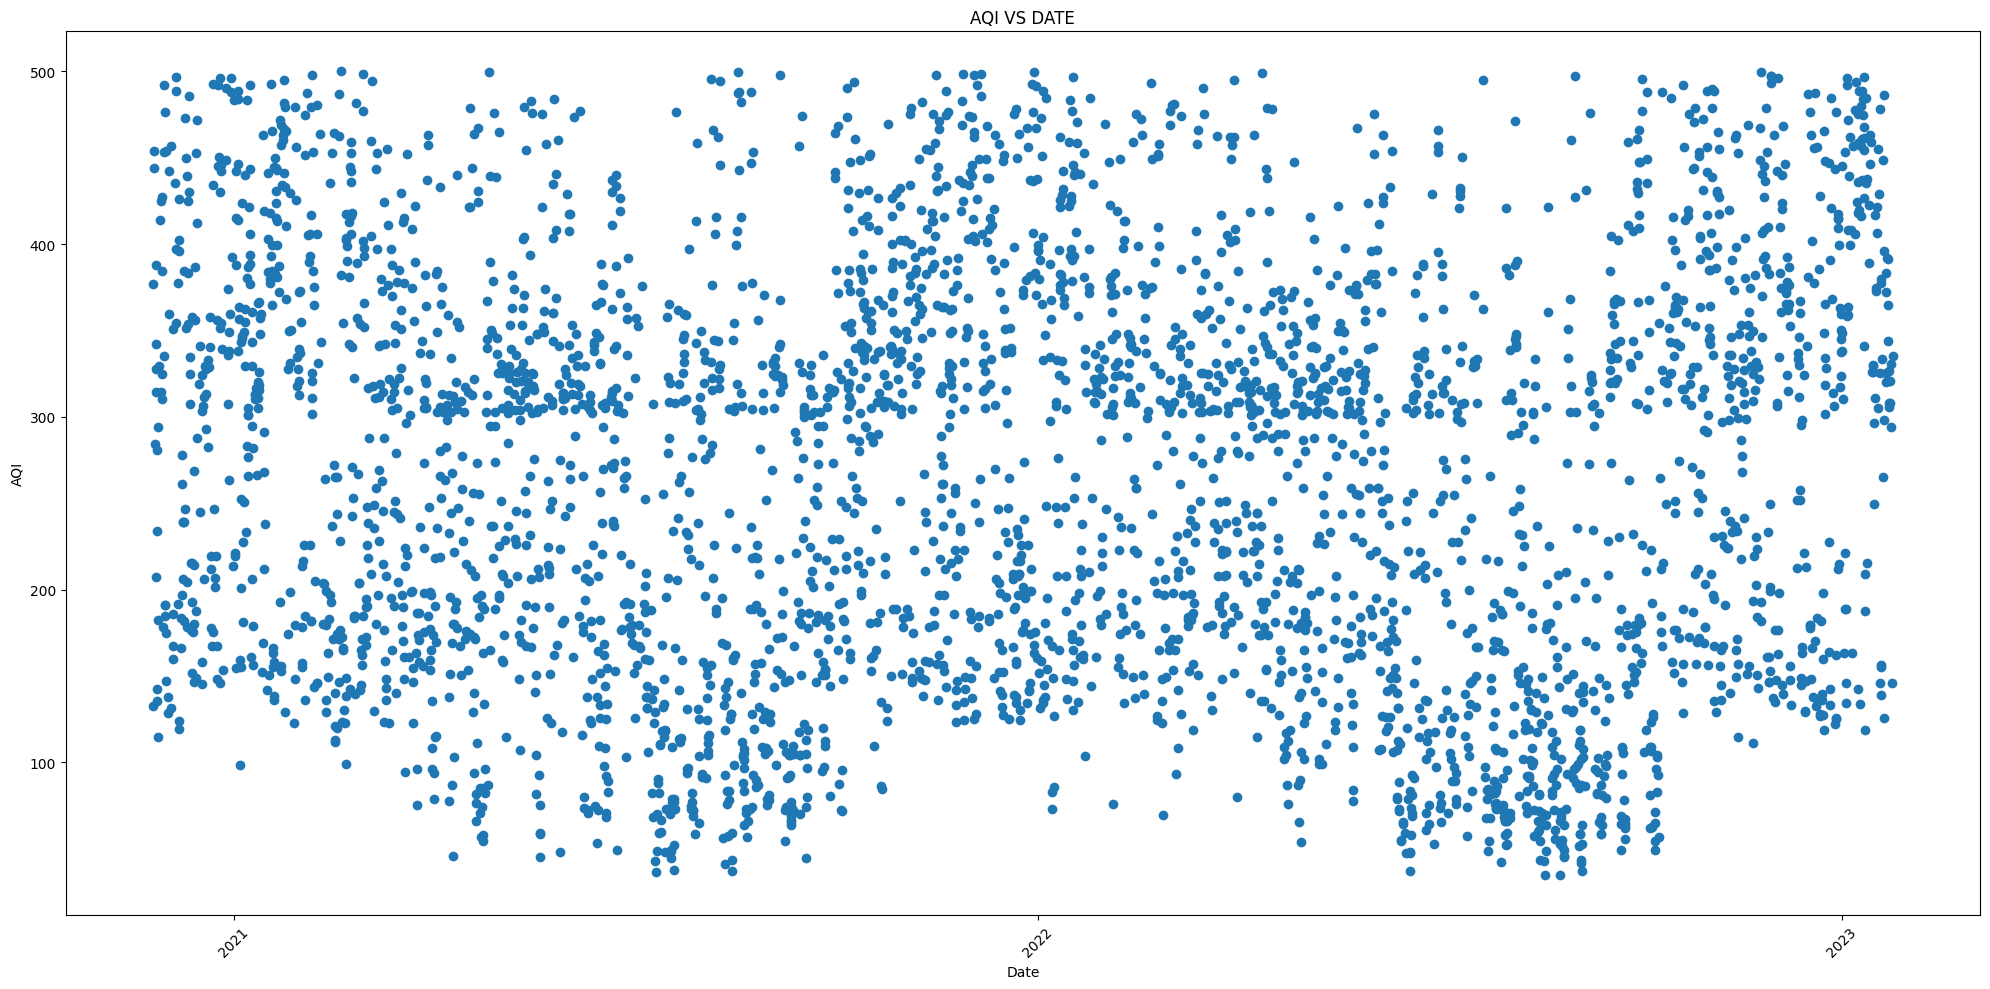

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

df = pd.read_csv("/content/delhi_aqi_minmax_normalized.csv")
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M', errors='coerce')

date_test = df.loc[y_test.index, 'date']
aqi_test = df.loc[y_test.index, 'Net_AQI']
plt.figure(figsize=(20, 10))
plt.scatter(date_test, aqi_test, marker='o')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI VS DATE')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


LINEAR REGRESSION STATISTICS AND FILE

Training MSE: 12375.483808652254
Validation MSE: 12596.646294846334


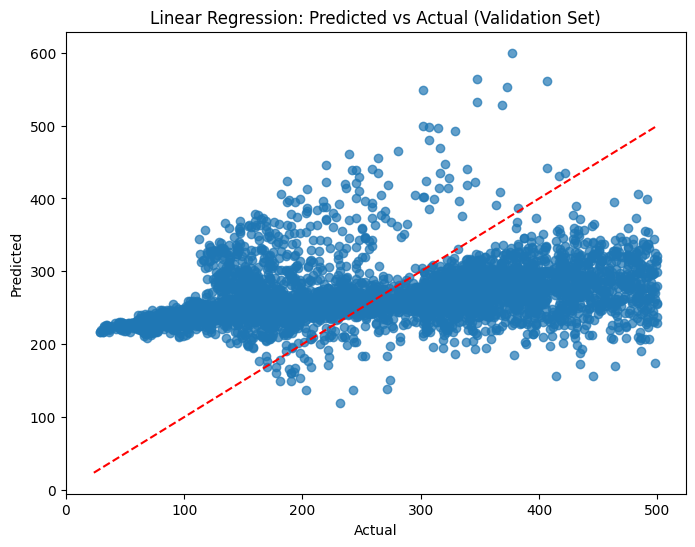

Training R² score: 0.11310387498126273
Validation R² score: 0.10712641630800346
Training R² (using model.score): 0.11310387498126273
Validation R² (using model.score): 0.10712641630800346
Jarque-Bera test p-value: 3.6817330857384687e-37
Shapiro-Wilk test p-value: 6.676272690655923e-29
KS test p-value: 9.988001844349653e-25


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("delhi_aqi_minmax_normalized.csv")
feature_cols = [col for col in df.columns if col not in ['date', 'Net_AQI']]
X = df[feature_cols]
y = df['Net_AQI']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

print(f"Training MSE: {mse_train}")
print(f"Validation MSE: {mse_val}")
plt.figure(figsize=(8,6))
plt.scatter(y_val, y_val_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()],'r--' )
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Predicted vs Actual (Validation Set)")
plt.show()

from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
print(f"Training R² score: {r2_train}")
r2_val = r2_score(y_val, y_val_pred)
print(f"Validation R² score: {r2_val}")
print(f"Training R² (using model.score): {lr.score(X_train, y_train)}")
print(f"Validation R² (using model.score): {lr.score(X_val, y_val)}")

import scipy.stats as stats
residuals = y_val - y_val_pred
jb_stat, jb_p = stats.jarque_bera(residuals)
print('Jarque-Bera test p-value:', jb_p)
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value:', shapiro_p)
ks_stat, ks_p = stats.kstest((residuals - residuals.mean()) / residuals.std(), 'norm')
print('KS test p-value:', ks_p)




In [ ]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("delhi_aqi_minmax_normalized.csv")
feature_cols = [col for col in df.columns if col not in ['date', 'Net_AQI' ]]
X = df[feature_cols]
y = df['Net_AQI']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                Net_AQI   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     299.8
Date:                Sat, 18 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:53:48   Log-Likelihood:            -1.1520e+05
No. Observations:               18776   AIC:                         2.304e+05
Df Residuals:                   18767   BIC:                         2.305e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        205.5958      1.760    116.804      0.0

ALL FEATURES ARE NOT DEPENDENT ON EACH OTHER AS COVRIANCE IS VERY LOW.

FOLLOWING METRICS GIVE AN IDEA THAT THE P VALUE FOR THE ENTIRE MODEL >> LEADING TO REJECTING THE HYPOTHESIS THAT EACH COEFFICIENT OF THE MODEL =0 -> IMPLIES THE MODEL IS BETTER THAN JUST USING MEAN OF Net_AQI.

all parameters except the NH3  have p value >0.05
From our OLS summary:
nh3 has a p-value of 0.065, which is greater than 0.05, indicating it is not a significant predictor in our model.

The variable no (nitric oxide) has the largest negative coefficient(339.3015), while pm10 has a large positive coefficient (230.2732), indicating that increases in no reduce the AQI, while increases in
pm10  increase it for the linear trend, assuming all else is held constant.

GRADIENT BOOSTING REGRESSOR MODEL

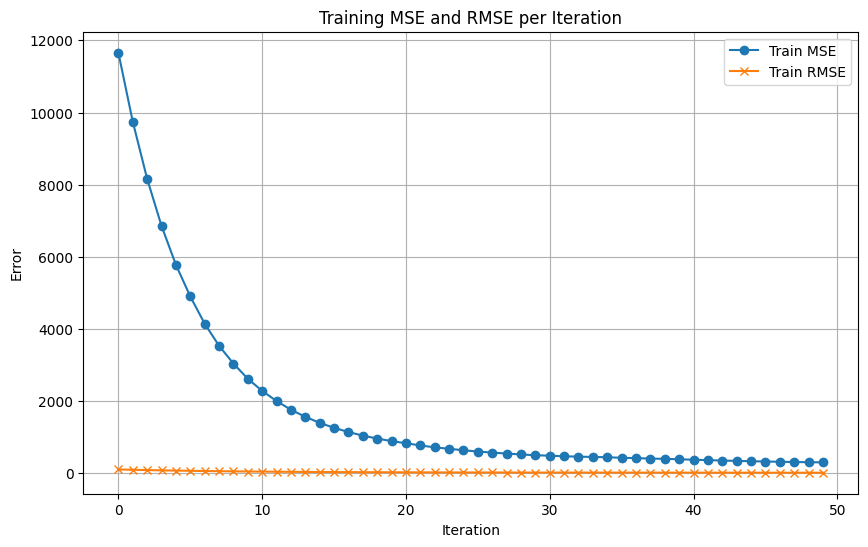

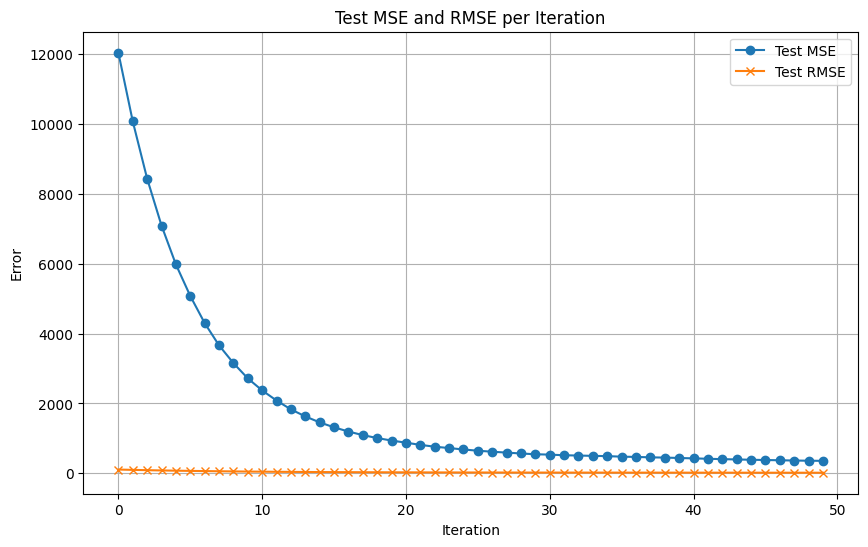

Final Test MSE  : 358.9624
Final Test RMSE : 18.9463
R² Score        : 0.9751


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("delhi_aqi_minmax_normalized.csv")
feature_cols = [col for col in df.columns if col not in ['date', 'Net_AQI']]
X = df[feature_cols]
y = df['Net_AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbm = GradientBoostingRegressor(n_estimators=50, random_state=42)
gbm.fit(X_train, y_train)
mse_train, mse_test, rmse_train, rmse_test = [], [], [], []


for y_pred_train, y_pred_test in zip(gbm.staged_predict(X_train), gbm.staged_predict(X_test)):
    mse_tr = mean_squared_error(y_train, y_pred_train)
    mse_te = mean_squared_error(y_test, y_pred_test)
    rmse_tr = np.sqrt(mse_tr)
    rmse_te = np.sqrt(mse_te)

    mse_train.append(mse_tr)
    mse_test.append(mse_te)
    rmse_train.append(rmse_tr)
    rmse_test.append(rmse_te)


plt.figure(figsize=(10,6))
plt.plot(mse_train, label='Train MSE', marker='o')
plt.plot(rmse_train, label='Train RMSE', marker='x')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()
plt.title('Training MSE and RMSE per Iteration')
plt.grid(True)
plt.show()
plt.figure(figsize=(10,6))
plt.plot(mse_test, label='Test MSE', marker='o')
plt.plot(rmse_test, label='Test RMSE', marker='x')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()
plt.title('Test MSE and RMSE per Iteration')
plt.grid(True)
plt.show()
y_pred_final = gbm.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred_final)
final_rmse = np.sqrt(final_mse)
r2 = r2_score(y_test, y_pred_final)

print(f"Final Test MSE  : {final_mse:.4f}")
print(f"Final Test RMSE : {final_rmse:.4f}")
print(f"R² Score        : {r2:.4f}")


Train R^2 Score: 0.9782
Test R^2 Score: 0.9751
Feature: pm2_5   | Importance: 0.6062
Feature: pm10    | Importance: 0.3146
Feature: o3      | Importance: 0.0561
Feature: no2     | Importance: 0.0103
Feature: so2     | Importance: 0.0064
Feature: co      | Importance: 0.0063
Feature: no      | Importance: 0.0001
Feature: nh3     | Importance: 0.0000


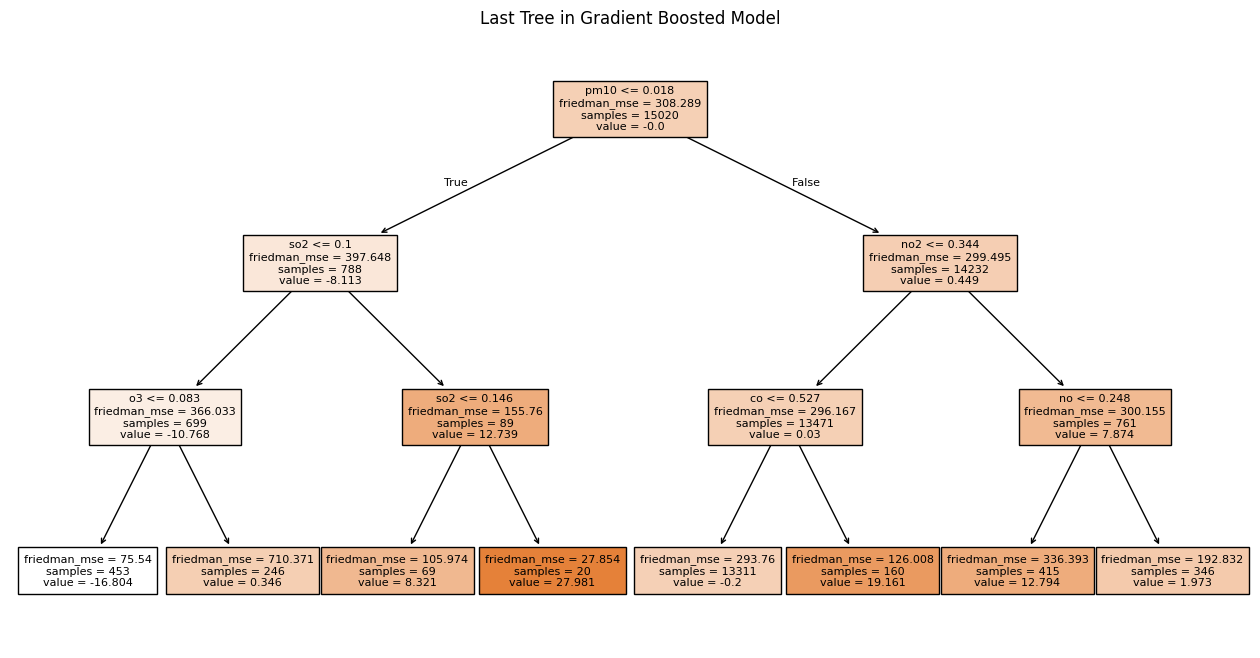

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
df = pd.read_csv("delhi_aqi_minmax_normalized.csv")
feature_cols = [col for col in df.columns if col not in ['date', 'Net_AQI']]
X = df[feature_cols]
y = df['Net_AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbm = GradientBoostingRegressor(n_estimators=50, random_state=42)
gbm.fit(X_train, y_train)
train_r2 = gbm.score(X_train, y_train)
test_r2 = gbm.score(X_test, y_test)
print(f"Train R^2 Score: {train_r2}")
print(f"Test R^2 Score: {test_r2}")
importances = gbm.feature_importances_
for f, imp in sorted(zip(feature_cols, importances), key=lambda x: x[1], reverse=True):
    print(f"Feature: {f} | Importance: {imp}")

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt

n_estimators = gbm.n_estimators   # total number of trees
last_tree = gbm.estimators_[-1, 0]  # Access last estimator (= last tree for regression)
plt.figure(figsize=(16,8))
plot_tree(last_tree, feature_names=feature_cols, filled=True, fontsize=8)
plt.title("Last Tree in Gradient Boosted Model")
plt.show()





We have a R^2 score of 0.98 which is high as we have depth of 3  tree depth and no restrictions on the number of samples we have at each node to begin splitting . By default sci kit allows 3 tree depth and a minimum sample count of 2 on each node.

IMP features as per the gradient decision trees are = pm2.5, pm10, o3.






Best Parameters: {'max_depth': 5, 'min_samples_split': 8}
Best CV Score (MSE): 273.6974224691623


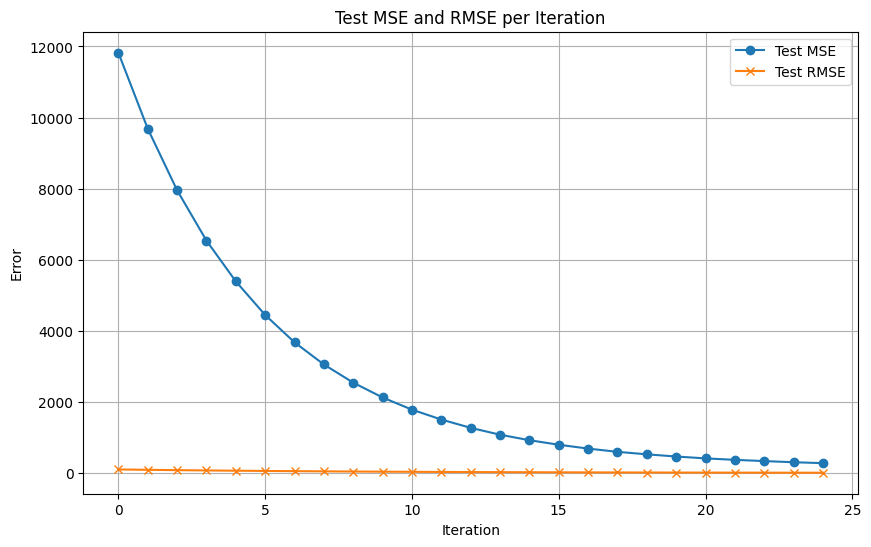

Final Test MSE  : 285.9366
Final Test RMSE : 16.9097
R² Score        : 0.9802


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("delhi_aqi_minmax_normalized.csv")
feature_cols = [col for col in df.columns if col not in ['date', 'Net_AQI']]
X = df[feature_cols]
y = df['Net_AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search for optimal max_depth and min_samples_split (smaller grid for speed)
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 8, 16]
}
gbm = GradientBoostingRegressor(n_estimators=25, random_state=42)
grid_search = GridSearchCV(
    estimator=gbm,
    param_grid=param_grid,
    cv=3,  # 3-fold for speed
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (MSE):", -grid_search.best_score_)
best_gbm = grid_search.best_estimator_
best_gbm.fit(X_train, y_train)


mse_train, mse_test, rmse_train, rmse_test = [], [], [], []
for y_pred_train, y_pred_test in zip(best_gbm.staged_predict(X_train), best_gbm.staged_predict(X_test)):
    mse_tr = mean_squared_error(y_train, y_pred_train)
    mse_te = mean_squared_error(y_test, y_pred_test)
    rmse_tr = np.sqrt(mse_tr)
    rmse_te = np.sqrt(mse_te)
    mse_train.append(mse_tr)
    mse_test.append(mse_te)
    rmse_train.append(rmse_tr)
    rmse_test.append(rmse_te)
plt.figure(figsize=(10,6))
plt.plot(mse_test, label='Test MSE', marker='o')
plt.plot(rmse_test, label='Test RMSE', marker='x')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()
plt.title('Test MSE and RMSE per Iteration')
plt.grid(True)
plt.show()
y_pred_final = best_gbm.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred_final)
final_rmse = np.sqrt(final_mse)
r2 = r2_score(y_test, y_pred_final)
print(f"Final Test MSE  : {final_mse:.4f}")
print(f"Final Test RMSE : {final_rmse:.4f}")
print(f"R² Score        : {r2:.4f}")
